In [1]:
# Import required modules
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# load csv file
data=pd.read_csv("U.S. Presidents Birth and Death Information - Sheet1.csv",sep=',',header=0)
data=data[:-1]

In [3]:
#Convert the date columns to conventional datetypes for operational ease
data['BIRTH DATE'] = pd.to_datetime(data['BIRTH DATE'])
data['DEATH DATE'] = pd.to_datetime(data['DEATH DATE'])

In [4]:
data["year_of_birth"] = pd.DatetimeIndex(data["BIRTH DATE"]).year.astype('Int64')
data.head()

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth
0,George Washington,1732-02-22,"Westmoreland Co., Va.",1799-12-14,"Mount Vernon, Va.",1732
1,John Adams,1735-10-30,"Quincy, Mass.",1826-07-04,"Quincy, Mass.",1735
2,Thomas Jefferson,1743-04-13,"Albemarle Co., Va.",1826-07-04,"Albemarle Co., Va.",1743
3,James Madison,1751-03-16,"Port Conway, Va.",1836-06-28,"Orange Co., Va.",1751
4,James Monroe,1758-04-28,"Westmoreland Co., Va.",1831-07-04,"New York, New York",1758


In [5]:
data["LOCATION OF DEATH"].fillna('Living', inplace=True)

In [6]:
# Adding todays date as death date to make calculations easier
today_date = datetime.now().strftime("%Y-%m-%d")
data["recent_date_living"] = data["DEATH DATE"]
data["recent_date_living"].fillna(today_date, inplace=True)

In [7]:
difference = pd.DatetimeIndex(data["recent_date_living"]) - pd.DatetimeIndex(data["BIRTH DATE"])
data["lived_days"] = difference/ np.timedelta64(1, "D")
data["lived_months"] = difference / np.timedelta64(1, "M")
data["lived_years"] = difference / np.timedelta64(1, "Y")
data["DEATH DATE"].fillna('Living', inplace=True)

In [8]:
# Sorting data by lived days in dsecending order, and then picking the top 10.
top_10_oldest = data.sort_values("lived_days", ascending=False).head(10)
# Converting lived years to integer
top_10_oldest["lived_years"] = top_10_oldest["lived_years"].astype(int)
# Changing lived_years column name to AGE
top_10_oldest.rename(columns={"lived_years": "AGE"}, inplace=True)
top_10_oldest = top_10_oldest.style
# Hide index
top_10_oldest.hide_index()
# Hide columns we used as variables
top_10_oldest.hide_columns(["recent_date_living", "lived_days", "lived_months"])
# Set title of the table
top_10_oldest.set_caption("Top 10 Presidents of the United States by age lived (Descending Order of Age)")
# Show the table
top_10_oldest

PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,AGE
Jimmy Carter,1924-10-01 00:00:00,"Plains, Georgia",Living,Living,1924,98
George Bush,1924-06-12 00:00:00,"Milton, Mass.",2018-11-30 00:00:00,"Houston, Texas",1924,94
Gerald Ford,1913-07-14 00:00:00,"Omaha, Nebraska",2006-12-26 00:00:00,"Rancho Mirage, Cal.",1913,93
Ronald Reagan,1911-02-06 00:00:00,"Tampico, Illinois",2004-06-05 00:00:00,"Los Angeles, Cal.",1911,93
John Adams,1735-10-30 00:00:00,"Quincy, Mass.",1826-07-04 00:00:00,"Quincy, Mass.",1735,90
Herbert Hoover,1874-08-10 00:00:00,"West Branch, Iowa",1964-10-20 00:00:00,"New York, New York",1874,90
Harry S. Truman,1884-05-08 00:00:00,"Lamar, Missouri",1972-12-26 00:00:00,"Kansas City, Missouri",1884,88
James Madison,1751-03-16 00:00:00,"Port Conway, Va.",1836-06-28 00:00:00,"Orange Co., Va.",1751,85
Thomas Jefferson,1743-04-13 00:00:00,"Albemarle Co., Va.",1826-07-04 00:00:00,"Albemarle Co., Va.",1743,83
Richard Nixon,1913-01-09 00:00:00,"Yorba Linda, Cal.",1994-04-22 00:00:00,"New York, New York",1913,81


In [9]:
top_10_youngest = data.sort_values("lived_days", ascending=True).head(10)
top_10_youngest["lived_years"] = top_10_youngest["lived_years"].astype(int)
top_10_youngest.rename(columns={"lived_years": "AGE"}, inplace=True)

top_10_youngest = top_10_youngest.style
top_10_youngest.hide_index()
top_10_youngest.hide_columns(["recent_date_living", "lived_months", "lived_days"])
top_10_youngest.set_caption("Top 10 Presidents of the United States by age lived, (Ascending Order of Age)")
top_10_youngest

PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,AGE
John F. Kennedy,1917-05-29 00:00:00,"Brookline, Mass.",1963-11-22 00:00:00,"Dallas, Texas",1917,46
James A. Garfield,1831-11-19 00:00:00,"Cuyahoga Co., Ohio",1881-09-19 00:00:00,"Elberon, New Jersey",1831,49
James K. Polk,1795-11-02 00:00:00,"Mecklenburg Co., N.C.",1849-06-15 00:00:00,"Nashville, Tennessee",1795,53
Abraham Lincoln,1809-02-12 00:00:00,"LaRue Co., Kentucky",1865-04-15 00:00:00,"Washington, D.C.",1809,56
Chester Arthur,1829-10-05 00:00:00,"Fairfield, Vermont",1886-11-18 00:00:00,"New York, New York",1829,57
Warren G. Harding,1865-11-02 00:00:00,"Morrow County, Ohio",1923-08-02 00:00:00,"San Francisco, Cal.",1865,57
William McKinley,1843-01-29 00:00:00,"Niles, Ohio",1901-09-14 00:00:00,"Buffalo, New York",1843,58
Theodore Roosevelt,1858-10-27 00:00:00,"New York, New York",1919-01-06 00:00:00,"Oyster Bay, New York",1858,60
Calvin Coolidge,1872-07-04 00:00:00,"Plymouth, Vermont",1933-01-05 00:00:00,"Northampton, Mass.",1872,60
Barack Obama,1961-08-04 00:00:00,"Honolulu, Hawaii",Living,Living,1961,61


In [10]:
# Extracting necessary cols
from os import stat

lived_days_col = data["lived_days"]
lived_years_col = data["lived_years"].astype(int)
value_counts = lived_years_col.value_counts()

# Calculating weights
# Using the frequency of a year as the weight
weights = []
for i in range(len(lived_years_col)):
    year = lived_years_col[i]
    weights.append(value_counts[year])
weights = np.array(weights)

# Getting weighted values
weighted_values = weights * lived_days_col

# Calculating the statistics
mean = lived_days_col.mean()
weighted_mean = weighted_values.sum() / weights.sum()
median = lived_days_col.median()
mode = lived_years_col.mode() * 365
max = lived_days_col.max()
min = lived_days_col.min()
std = lived_days_col.std()

Statistic = ["Mean Age", "Weighted Mean Age", "Median Age", "Mode Age", "Maximum Age", "Minimum Age", "Standard Deviation"]
val_DAYS = [mean, weighted_mean, median, list(mode), max, min, std]
val_Years = [mean / 365, weighted_mean / 365, median / 365, [x / 365 for x in list(mode)], max / 365, min / 365, std / 365]

stats=pd.DataFrame()
stats["Statistic"] = Statistic
stats["Age in Days"] = val_DAYS
stats["Age in Years"] = val_Years

stats.style.hide_index()

Statistic,Age in Days,Age in Years
Mean Age,26416.977778,72.375282
Weighted Mean Age,26471.173333,72.523763
Median Age,26227.000000,71.854795
Mode Age,"[24455, 27740]","[67.0, 76.0]"
Maximum Age,35820.000000,98.136986
Minimum Age,16978.000000,46.515068
Standard Deviation,4586.423039,12.565543


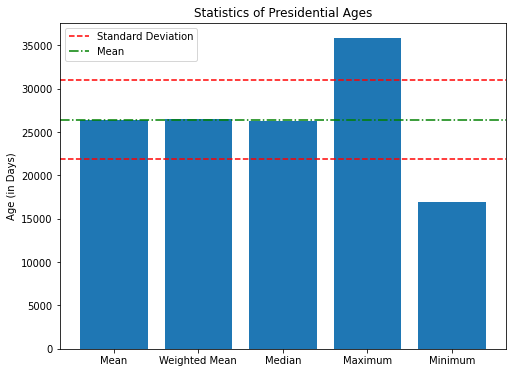

In [11]:
# Plotting the data using matplotlib

x_axis = ["Mean", "Weighted Mean", "Median", "Maximum", "Minimum"]
x_axis_positions = range(len(x_axis))
y_axis = [mean, weighted_mean, median, max, min]
plt.figure(figsize=(8, 6))
plt.bar(x_axis_positions, y_axis)
plt.ylabel("Age (in Days)")
plt.title("Statistics of Presidential Ages")

plt.axhline(y = mean + std, color = 'r', linestyle = '--', label='Standard Deviation')
plt.axhline(y = mean, color = 'green', linestyle = '-.', label='Mean')
plt.axhline(y = mean - std, color = 'r', linestyle = '--')

plt.legend(labels=['Standard Deviation', 'Mean'])

plt.xticks(x_axis_positions, x_axis)
plt.show()

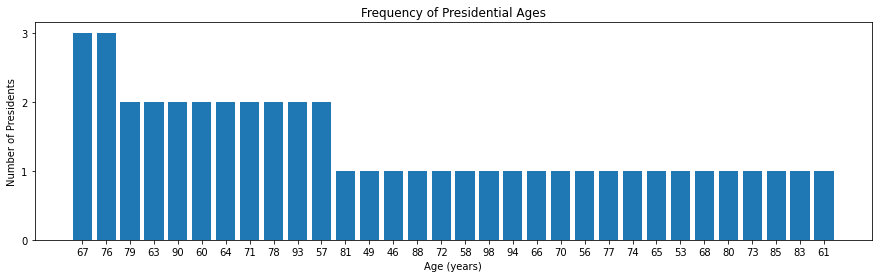

In [12]:
x_axis_positions = [i for i in range(len(value_counts))]
plt.figure(figsize=(15, 4))
plt.bar(x_axis_positions, value_counts)
plt.xlabel("Age (years)")
plt.ylabel("Number of Presidents")
plt.title("Frequency of Presidential Ages")

plt.xticks(x_axis_positions, value_counts.keys())
plt.yticks(range(value_counts.max() + 1))
plt.show()